# Évaluation des modèles (SVM, Naive Bayes, Regression Logistique, Arbre de Décision)

## 1. Télechargement des packages nécessaires

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score,precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## 2. Importation des valeurs du taux de faux positifs, du taux de vrais positifs et de l'AUC des modèles

In [2]:
with open('Variables/variables.pkl', 'rb') as f:
    (df, X_train, X_test, y_train, y_test,X_train_smote, y_train_smote) = pickle.load(f)

In [3]:
with open('Variables/roc_data_svm.pkl', 'rb') as f:#charger des donnees de svm
    roc_data_svm = pickle.load(f)

fpr_svm = roc_data_svm['fpr_svm']
tpr_svm = roc_data_svm['tpr_svm']
auc_svm = roc_data_svm['auc_svm']
pred_svm = roc_data_svm['pred_svm']

In [4]:
with open('Variables/roc_data_NB.pkl', 'rb') as f:#charger des donnees de NB
    roc_data_NB = pickle.load(f)

fpr_nb = roc_data_NB['fpr_nb']
tpr_nb = roc_data_NB['tpr_nb']
auc_nb = roc_data_NB['auc_nb']
pred_nb = roc_data_NB['pred_nb']

In [5]:
with open('Variables/roc_data_log.pkl', 'rb') as f: #charger des donnees de reg logistique
    roc_data_log = pickle.load(f)

fpr_log = roc_data_log['fpr_log']
tpr_log = roc_data_log['tpr_log']
auc_log = roc_data_log['auc_log']
pred_log = roc_data_log['pred_log']
pred_log = (pred_log >= 0.5).astype(int) 

In [6]:
with open('Variables/roc_data_tree.pkl', 'rb') as f: #charger des donnees de abre de decision
    roc_data_tree = pickle.load(f)

fpr_tree = roc_data_tree['fpr_dt']
tpr_tree = roc_data_tree['tpr_dt']
auc_tree = roc_data_tree['roc_dt']
pred_tree = roc_data_tree['pred_dt']

## 3. Évaluation et Critique

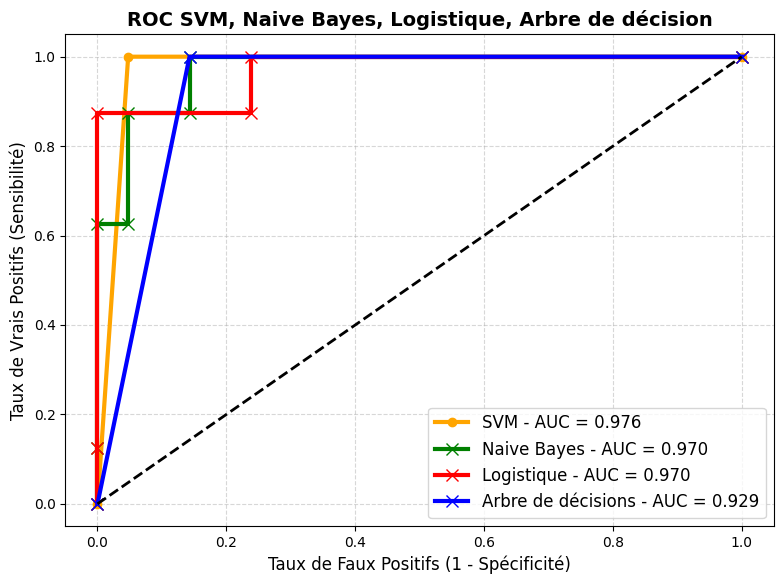

In [7]:
plt.figure(figsize=(8, 6))

# Plot SVC (Noyau RBF)
plt.plot(fpr_svm, tpr_svm, label=f'SVM - AUC = {auc_svm:.3f}', linewidth=3, marker='o', markersize=6, markerfacecolor='orange', color='orange')

# Plot Naive Bayes
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes - AUC = {auc_nb:.3f}', linewidth=3, marker='x', markersize=8, markerfacecolor='green', color='green')

# Plot Logistic
plt.plot(fpr_log, tpr_log, label=f'Logistique - AUC = {auc_log:.3f}', linewidth=3, marker='x', markersize=8, markerfacecolor='red', color='red')

# Plot abre de decision
plt.plot(fpr_tree, tpr_tree, label=f'Arbre de décisions - AUC = {auc_tree:.3f}', linewidth=3, marker='x', markersize=8, markerfacecolor='blue', color='blue')

# Ajouter une ligne diagonale (modèle aléatoire)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.rcParams['font.size'] = 12
plt.title('ROC SVM, Naive Bayes, Logistique, Arbre de décision', fontsize=14, fontweight='bold')
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (Sensibilité)', fontsize=12)

plt.legend(loc='lower right', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()
plt.savefig("../Image/ROC_4modeles.png")
plt.show()

In [8]:
models = {
    "SVM": pred_svm,
    "Naive Bayes": pred_nb,
    "Régression Logistique":pred_log,
    "Arbre de Décision" :pred_tree
}

# Calcul de la précision (Accuracy) pour chaque modèle
accuracy_scores = {model: accuracy_score(y_test, y_pred) for model, y_pred in models.items()}

# Calcul du F1-score pour chaque modèle
f1_scores = {model: f1_score(y_test, y_pred) for model, y_pred in models.items()}
recall_scores = {kernel: recall_score(y_test, y_pred) for kernel, y_pred in models.items()}
precision_scores = {kernel: precision_score(y_test, y_pred) for kernel, y_pred in models.items()}

auc_scores = {
    "svm": auc_svm,
    "nb": auc_nb,
    "log":auc_log,
    "dt":auc_tree
}

# Création d'un DataFrame pour afficher les résultats
df_results = pd.DataFrame({
    "Model": accuracy_scores.keys(),
    "Accuracy": [round(acc, 5) for acc in accuracy_scores.values()],
    "F1-score": [round(f1, 5) for f1 in f1_scores.values()],
    "Precision": [round(prec, 5) for prec in precision_scores.values()],
    "Recall": [round(rec, 5) for rec in recall_scores.values()],
    "AUC-ROC": [round(auc_val, 5) for auc_val in auc_scores.values()]
})

# Affichage du tableau des résultats
print("Table de comparaison des modèles")
print(tabulate(df_results, headers='keys', tablefmt='pretty', showindex=False))

Table de comparaison des modèles
+-----------------------+----------+----------+-----------+--------+---------+
|         Model         | Accuracy | F1-score | Precision | Recall | AUC-ROC |
+-----------------------+----------+----------+-----------+--------+---------+
|          SVM          | 0.96552  | 0.94118  |  0.88889  |  1.0   | 0.97619 |
|      Naive Bayes      | 0.93103  |  0.875   |   0.875   | 0.875  | 0.97024 |
| Régression Logistique | 0.89655  | 0.82353  |  0.77778  | 0.875  | 0.97024 |
|   Arbre de Décision   | 0.89655  | 0.84211  |  0.72727  |  1.0   | 0.92857 |
+-----------------------+----------+----------+-----------+--------+---------+


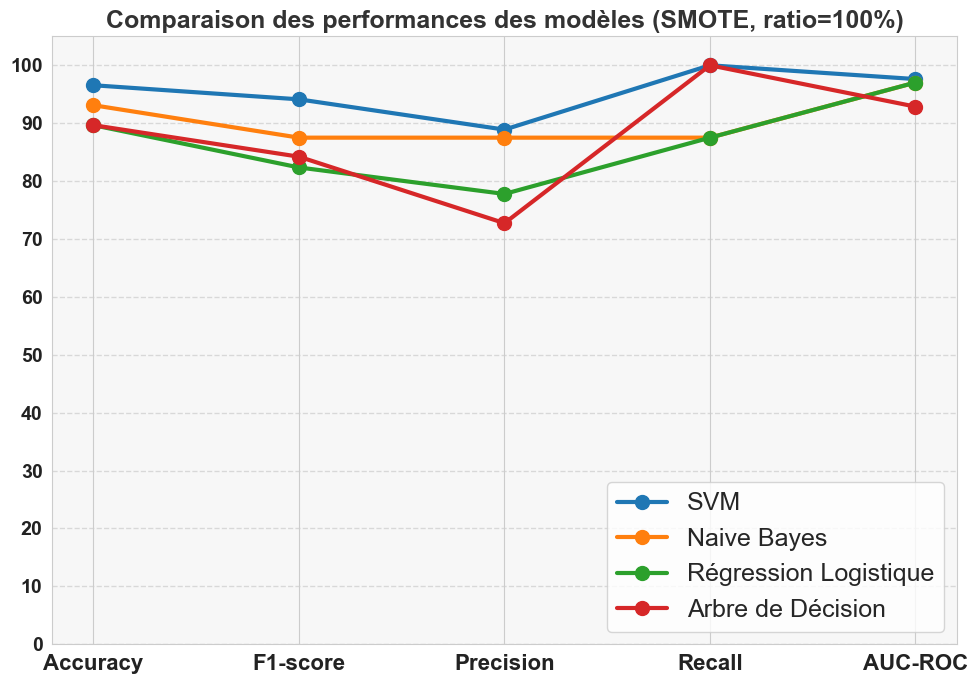

In [9]:
sns.set_style("whitegrid")  
plt.figure(figsize=(10, 7))

metriques = ["Accuracy", "F1-score", "Precision", "Recall", "AUC-ROC"]

# Préparer les scores en pourcentage
scores_modeles = {modele: [df_results.loc[i, metrique] * 100 for metrique in metriques] 
                  for i, modele in enumerate(df_results["Model"])}

couleurs = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Bleu, orange, vert, rouge

# Ajouter un fond gris clair au graphique
ax = plt.gca()
ax.set_facecolor("#f7f7f7")  # Fond gris

# Tracer chaque modèle avec une couleur différente et un style propre
for (modele, scores), couleur in zip(scores_modeles.items(), couleurs):
    plt.plot(metriques, scores, marker="o", linestyle="-", linewidth=3, markersize=10, color=couleur, label=modele)

plt.title("Comparaison des performances des modèles (SMOTE, ratio=100%)", 
          fontsize=18, fontweight="bold", color="#333333")

# Ajuster l'axe Y et les ticks
plt.ylim(0, 105)  # Ajouter un peu d'espace au-dessus de 100
plt.yticks(range(0, 110, 10), fontsize=14, fontweight="bold", color="#222222")

plt.xticks(fontsize=16, fontweight="bold", fontname="Arial", color="#222222")  

plt.legend(loc='lower right', fontsize=18)

plt.grid(axis="y", linestyle="--", linewidth=1, alpha=0.7)

plt.tight_layout()  #
plt.savefig("../Image/perform_4modeles.png") 
plt.show()